In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score

# Load Data Iris

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                       columns= iris['feature_names'] + ['target'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# EDA

<Axes: xlabel='target'>

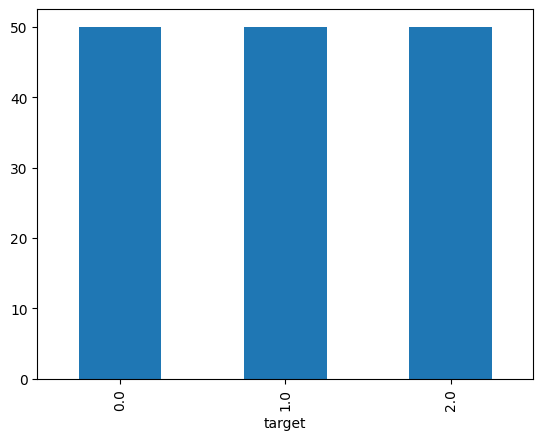

In [3]:
jml_category = iris_df.target.value_counts()
jml_category.plot(kind='bar')

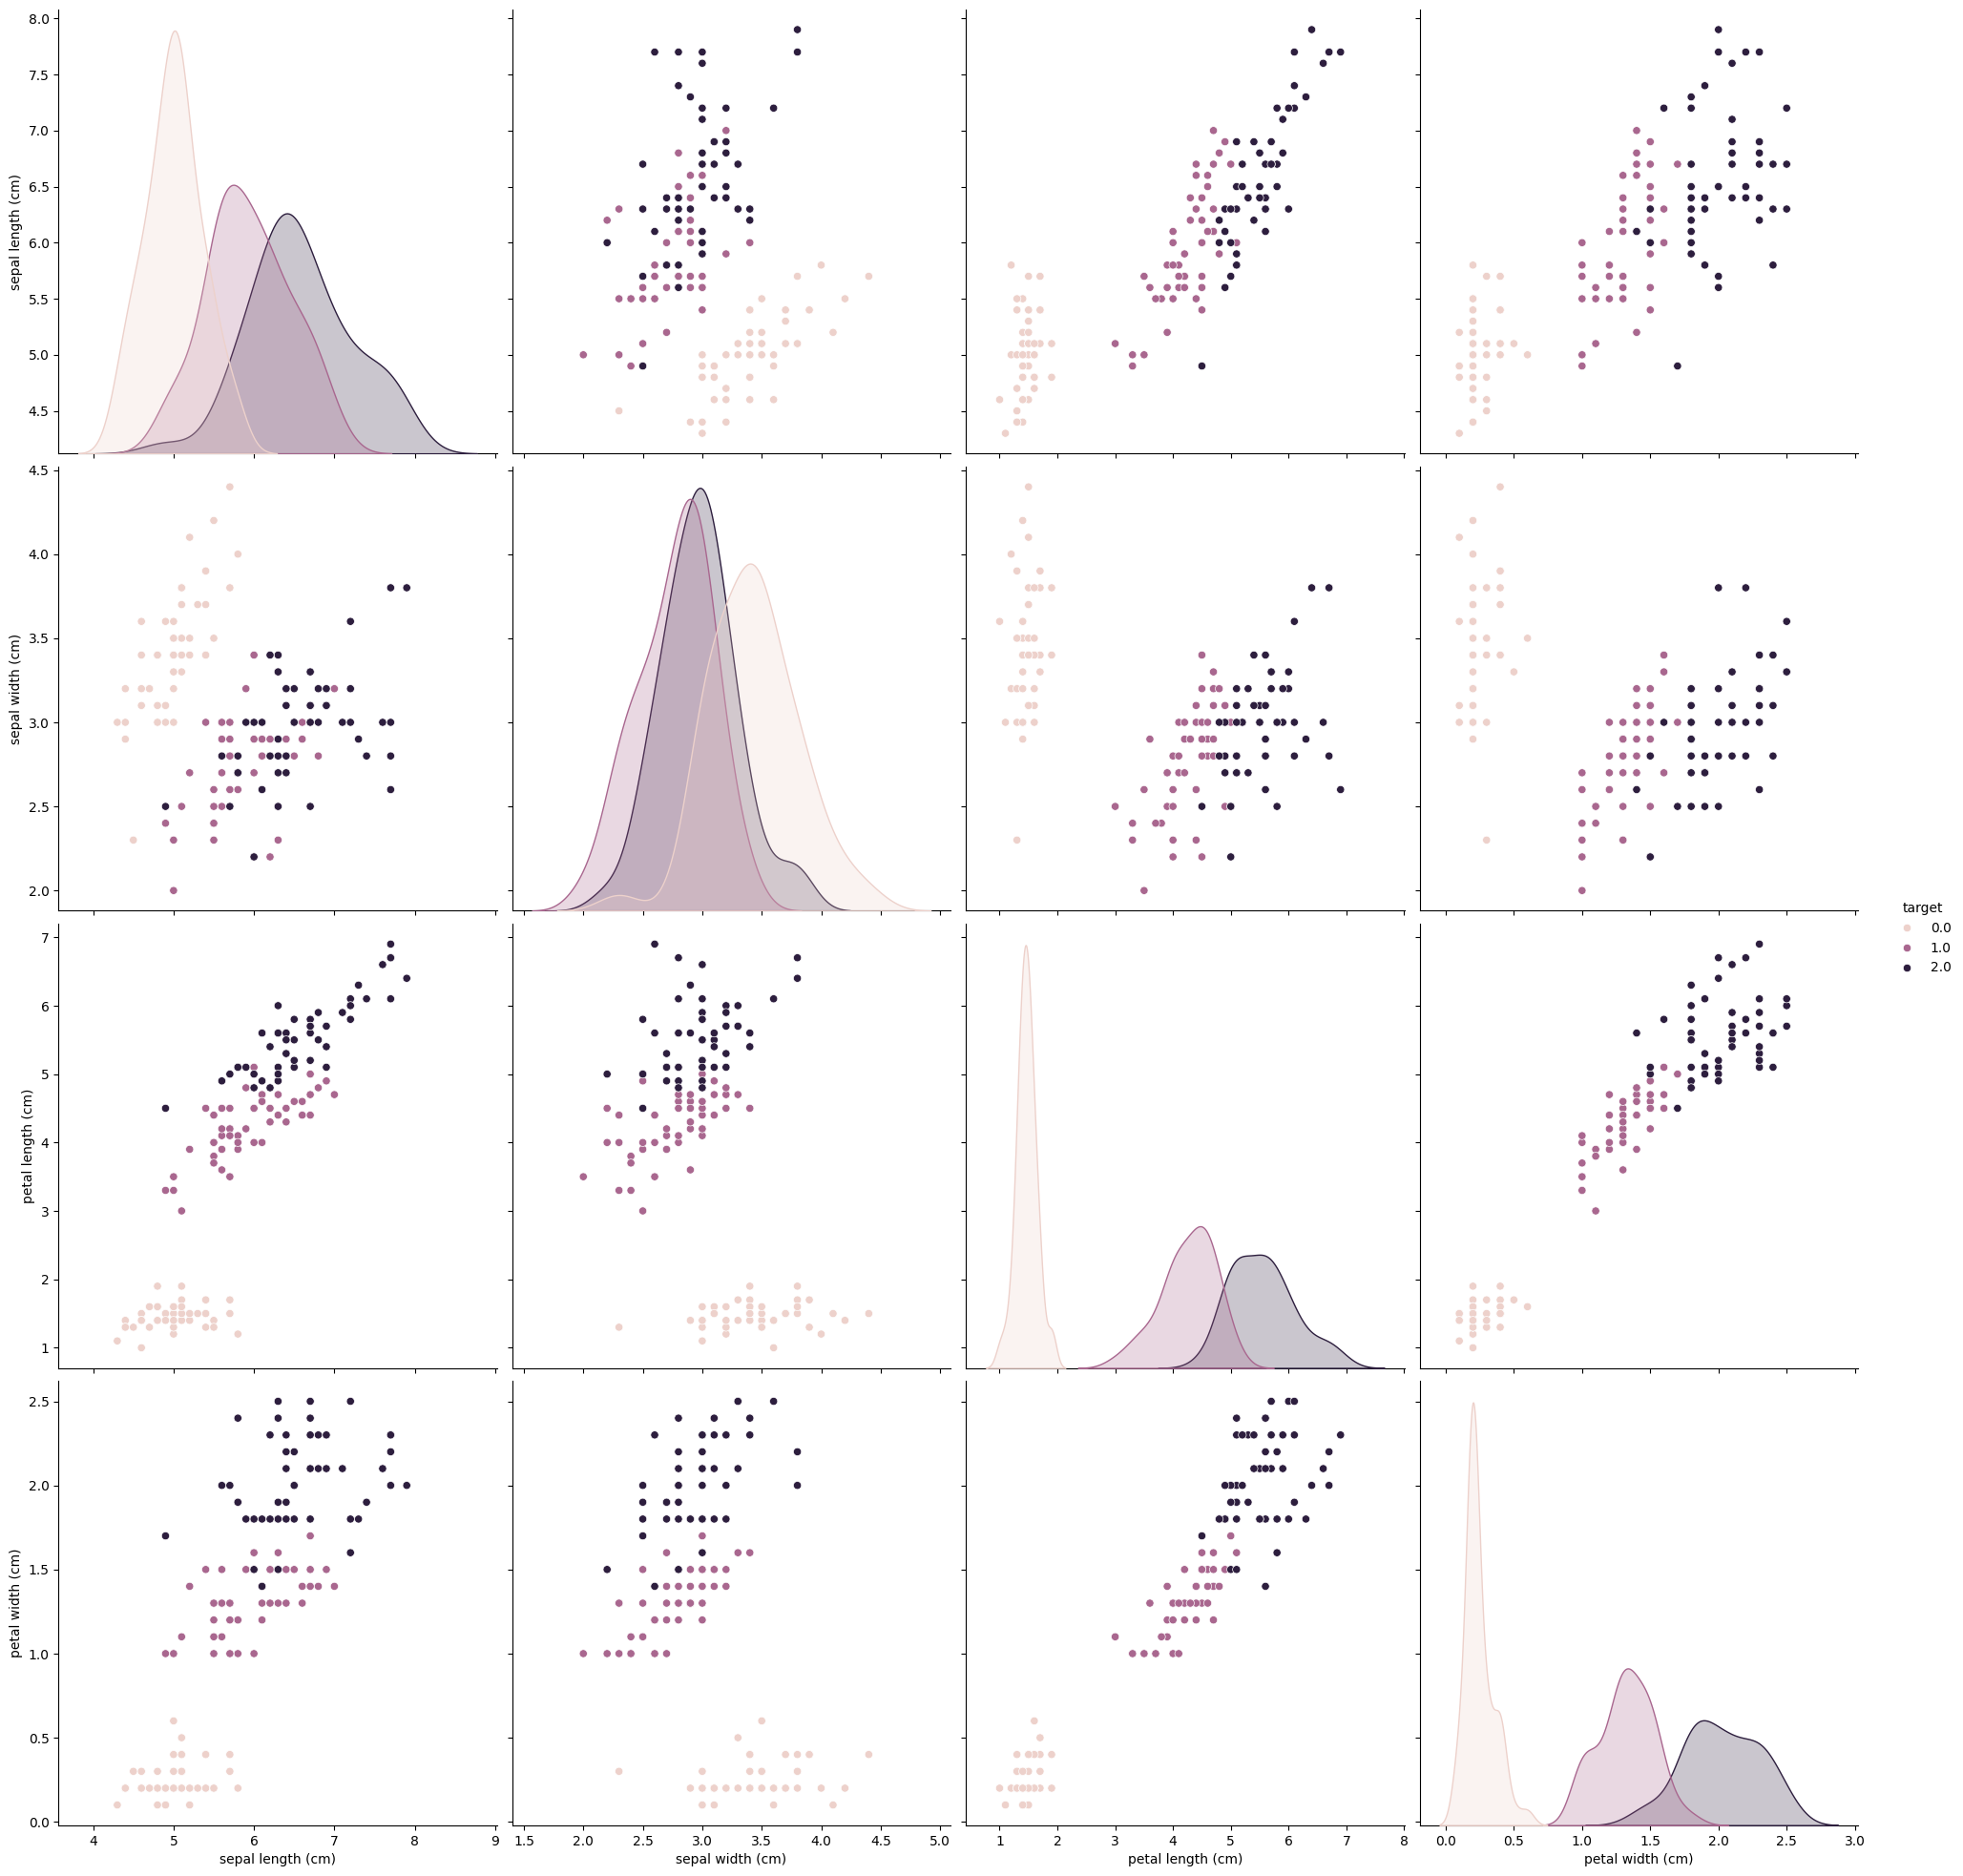

In [5]:
sns.pairplot(iris_df, hue = "target", height = 5)

# Data Preprocessing
## Pemisahan Features (X) dan Target (Y)

In [4]:
X = iris_df.drop(["target"], axis = 1)
y = iris_df["target"]
print(X.shape, y.shape)

(150, 4) (150,)


## Scaling Nilai Features (X)

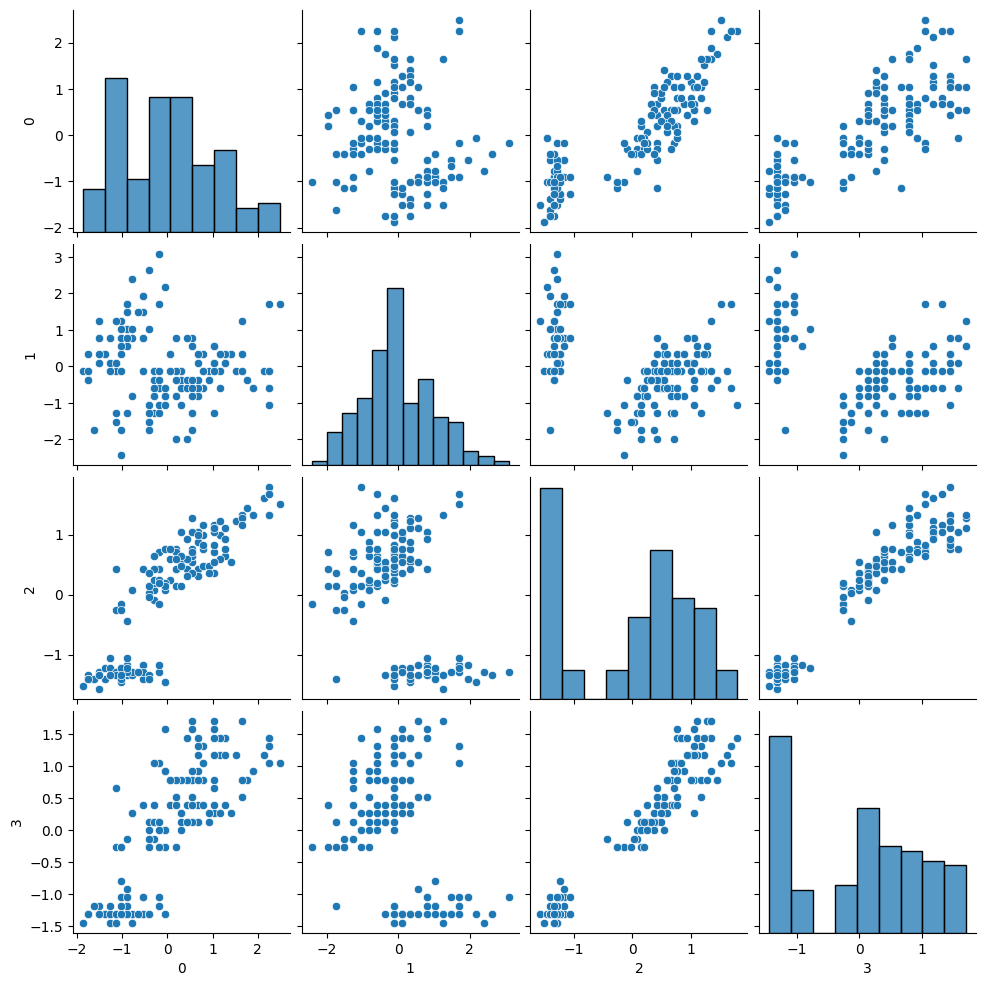

In [6]:
sc = StandardScaler()
X = sc.fit_transform(X)
sns.pairplot(pd.DataFrame(X))

## Split Data Training dan Testing
memotong data sample menjadi 2 bagian dengan rasio 0.8 dan 0.2

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
print('Data Training: X', X_train.shape, 'Y', y_train.shape)
print('Data Test: X', X_test.shape, 'Y', y_test.shape)

Data Training: X (120, 4) Y (120,)
Data Test: X (30, 4) Y (30,)


# Model Development
## Training Model
### Decision Tree

In [8]:
# Proses training model
dt_mod = DecisionTreeClassifier()
dt_mod.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
### Memprediksi data training kembali dengan model yang dikembangkan
y_pred = dt_mod.predict(X_train)
y_pred[:5]

array([0., 2., 1., 0., 1.])

In [10]:
### Evaluasi hasil prediksi data training
acc_score = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)

print('Performa Training:', acc_score, end='\n\n')
print('Classification Report:', report)

Performa Training: 1.0

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [20]:
### Memprediksi data testing yang sudah di siapkan
y_pred = dt_mod.predict(X_test)
y_pred[:5]

array([0., 2., 1., 1., 0.])

In [21]:
### Evaluasi hasil prediksi data testing
acc_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Performa Testing:', acc_score, end='\n\n')
print('Classification Report:', report)

Performa Training: 0.9666666666666667

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.90      0.95        10
         2.0       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [23]:
# Proses training model
svc_mod = SVC()
svc_mod.fit(X_train, y_train)

SVC()

In [28]:
### Memprediksi data training kembali dengan model yang dikembangkan
y_pred = svc_mod.predict(X_train)
y_pred[:5]

array([0., 2., 1., 0., 1.])

In [29]:
### Evaluasi hasil prediksi data training
acc_score = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)

print('Performa Training:', acc_score, end='\n\n')
print('Classification Report:', report)

Performa Training: 0.975

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       0.95      0.97      0.96        40
         2.0       0.97      0.95      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [32]:
### Memprediksi data testing yang sudah di siapkan
y_pred = svc_mod.predict(X_test)
y_pred[:5]

array([0., 2., 1., 1., 0.])

In [33]:
### Evaluasi hasil prediksi data testing
acc_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Performa Testing:', acc_score, end='\n\n')
print('Classification Report:', report)

Performa Training: 0.9666666666666667

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.90      0.95        10
         2.0       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### kesimpulan
- dengan nilai evaluasi testing yang sama, model SVC memiliki nilai evaluasi data training yang lebih rendah dibandingkan model decision tree
- Hal ini dapat menunjukan bahwa model SVC dapat dianggap lebih good fit dibandingkan dengan model decision tree karena perbedaan hasil evaluasi training dan testing yang lebih kecil

**Percobaan max_depth berbeda**

Silahkan buat percobaan dengan menggunakan nilai max_depth yang berbeda untuk melatih model Decision Tree dan bandingkan hasil evaluasi dengan nilai yang berbeda tersebut.

gunakan nilai max_depth = [3,4,5]

In [38]:
# max_depth 3
dt_mod = DecisionTreeClassifier(max_depth=3)
dt_mod.fit(X_train, y_train)

### Memprediksi data training kembali dengan model yang dikembangkan
y_pred = dt_mod.predict(X_train)
y_pred[:5]

### Evaluasi hasil prediksi data training
acc_score = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)

print('Performa Training:', acc_score, end='\n\n')
print('Classification Report:', report)

### Memprediksi data testing yang sudah di siapkan
y_pred = dt_mod.predict(X_test)
y_pred[:5]

### Evaluasi hasil prediksi data testing
acc_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Performa Testing:', acc_score, end='\n\n')
print('Classification Report:', report)

Performa Training: 0.9833333333333333

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       1.00      0.95      0.97        40
         2.0       0.95      1.00      0.98        40

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

Performa Testing: 0.9666666666666667

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.90      0.95        10
         2.0       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [39]:
# max_depth 4
dt_mod = DecisionTreeClassifier(max_depth=4)
dt_mod.fit(X_train, y_train)

### Memprediksi data training kembali dengan model yang dikembangkan
y_pred = dt_mod.predict(X_train)
y_pred[:5]

### Evaluasi hasil prediksi data training
acc_score = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)

print('Performa Training:', acc_score, end='\n\n')
print('Classification Report:', report)

### Memprediksi data testing yang sudah di siapkan
y_pred = dt_mod.predict(X_test)
y_pred[:5]

### Evaluasi hasil prediksi data testing
acc_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Performa Testing:', acc_score, end='\n\n')
print('Classification Report:', report)

Performa Training: 0.9916666666666667

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       0.98      1.00      0.99        40
         2.0       1.00      0.97      0.99        40

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Performa Testing: 0.9333333333333333

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.90      0.90      0.90        10
         2.0       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [40]:
# max_depth 5
dt_mod = DecisionTreeClassifier(max_depth=5)
dt_mod.fit(X_train, y_train)

### Memprediksi data training kembali dengan model yang dikembangkan
y_pred = dt_mod.predict(X_train)
y_pred[:5]

### Evaluasi hasil prediksi data training
acc_score = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)

print('Performa Training:', acc_score, end='\n\n')
print('Classification Report:', report)

### Memprediksi data testing yang sudah di siapkan
y_pred = dt_mod.predict(X_test)
y_pred[:5]

### Evaluasi hasil prediksi data testing
acc_score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Performa Testing:', acc_score, end='\n\n')
print('Classification Report:', report)

Performa Training: 1.0

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Performa Testing: 0.9666666666666667

Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.90      0.95        10
         2.0       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



**Kesimpulan**
- Max Depth 3 dan 5 menunjukan nilai testing yang sama dengan model DT sebelumnya, namun max_depth 3 memiliki nilai evaluasi training yang lebih rendah sedikit
- max dept 4 menunjukan penurunan nilai testing dibanding dengan model DT yang lain
- Pilihan terbaik adalah dengan menggunakan max_depth 3 karena model dinilai lebih good fit dan simple karena DT yang dibuat dibatasi pada 3 level percabangan yang lebih sedikit dibanding model lain.

<Axes: xlabel='SepalLengthCm', ylabel='Count'>

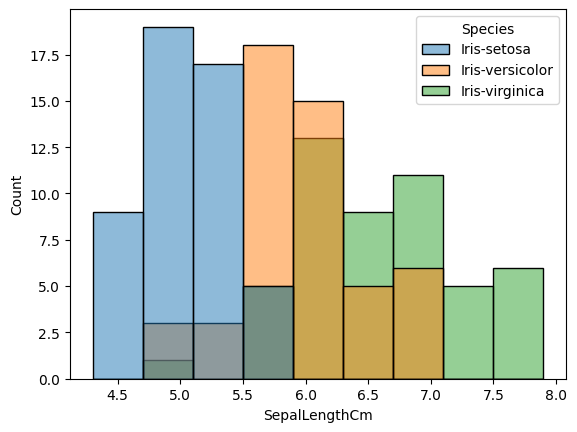

In [7]:
sns.histplot(data=df,x='SepalLengthCm', hue='Species')

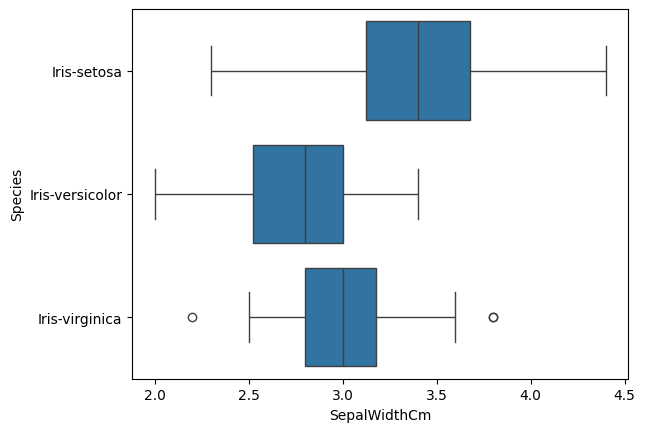

In [12]:
sns.boxplot(data=df, x='SepalWidthCm', y='Species')
plt.show()

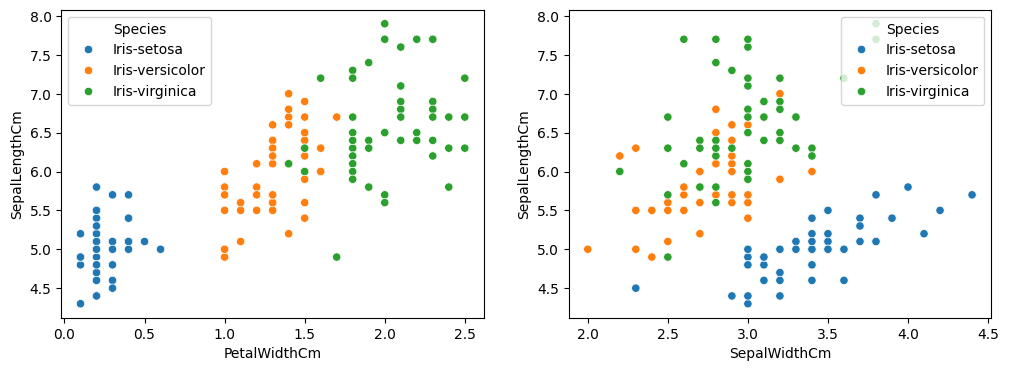

In [16]:
fig, axs= plt.subplots(1,2, figsize=(12,4))
sns.scatterplot(data=df,
                y='SepalLengthCm',
                x='PetalWidthCm',
                hue='Species',
                ax=axs[0])
sns.scatterplot(data=df,
                y='SepalLengthCm',
                x='SepalWidthCm',
                hue='Species',
                ax=axs[1])
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

X=df.drop(['Id','Species'], axis=1)
y=df['Species']

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=12345)

In [31]:
from sklearn.svm import SVC

#define
model_svm=SVC(kernel='linear', #rbf #ploy
             decision_function_shape='ovr')

#fit
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [32]:
model_svm.score(X_test, y_test)

0.9666666666666667

In [46]:
from sklearn.tree import DecisionTreeClassifier

#define
model_dectree= DecisionTreeClassifier(criterion='gini', max_depth=3)#gini/entropy, normalnya ga pake max depth

model_dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [47]:
model_dectree.score(X_test, y_test)

0.9666666666666667

In [48]:
from sklearn.tree import export_graphviz, export_text

print(export_text(model_dectree, feature_names=X.columns))

|--- PetalWidthCm <= 0.80
|   |--- class: Iris-setosa
|--- PetalWidthCm >  0.80
|   |--- PetalWidthCm <= 1.75
|   |   |--- PetalLengthCm <= 4.95
|   |   |   |--- class: Iris-versicolor
|   |   |--- PetalLengthCm >  4.95
|   |   |   |--- class: Iris-virginica
|   |--- PetalWidthCm >  1.75
|   |   |--- class: Iris-virginica



In [49]:
print(export_graphviz(model_dectree, feature_names=X.columns,
                      class_names=model_dectree.classes_))

#copykan ke https://dreampuf.github.io/GraphvizOnline/#digraph%20Tree%20%7B%0D%0Anode%20%5Bshape%3Dbox%2C%20fontname%3D%22helvetica%22%5D%20%3B%0D%0Aedge%20%5Bfontname%3D%22helvetica%22%5D%20%3B%0D%0A0%20%5Blabel%3D%22PetalWidthCm%20%3C%3D%200.8%5Cngini%20%3D%200.666%5Cnsamples%20%3D%20120%5Cnvalue%20%3D%20%5B39%2C%2038%2C%2043%5D%5Cnclass%20%3D%20Iris-virginica%22%5D%20%3B%0D%0A1%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%2039%5Cnvalue%20%3D%20%5B39%2C%200%2C%200%5D%5Cnclass%20%3D%20Iris-setosa%22%5D%20%3B%0D%0A0%20-%3E%201%20%5Blabeldistance%3D2.5%2C%20labelangle%3D45%2C%20headlabel%3D%22True%22%5D%20%3B%0D%0A2%20%5Blabel%3D%22PetalWidthCm%20%3C%3D%201.75%5Cngini%20%3D%200.498%5Cnsamples%20%3D%2081%5Cnvalue%20%3D%20%5B0%2C%2038%2C%2043%5D%5Cnclass%20%3D%20Iris-virginica%22%5D%20%3B%0D%0A0%20-%3E%202%20%5Blabeldistance%3D2.5%2C%20labelangle%3D-45%2C%20headlabel%3D%22False%22%5D%20%3B%0D%0A3%20%5Blabel%3D%22PetalLengthCm%20%3C%3D%204.95%5Cngini%20%3D%200.172%5Cnsamples%20%3D%2042%5Cnvalue%20%3D%20%5B0%2C%2038%2C%204%5D%5Cnclass%20%3D%20Iris-versicolor%22%5D%20%3B%0D%0A2%20-%3E%203%20%3B%0D%0A4%20%5Blabel%3D%22gini%20%3D%200.053%5Cnsamples%20%3D%2037%5Cnvalue%20%3D%20%5B0%2C%2036%2C%201%5D%5Cnclass%20%3D%20Iris-versicolor%22%5D%20%3B%0D%0A3%20-%3E%204%20%3B%0D%0A5%20%5Blabel%3D%22gini%20%3D%200.48%5Cnsamples%20%3D%205%5Cnvalue%20%3D%20%5B0%2C%202%2C%203%5D%5Cnclass%20%3D%20Iris-virginica%22%5D%20%3B%0D%0A3%20-%3E%205%20%3B%0D%0A6%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%2039%5Cnvalue%20%3D%20%5B0%2C%200%2C%2039%5D%5Cnclass%20%3D%20Iris-virginica%22%5D%20%3B%0D%0A2%20-%3E%206%20%3B%0D%0A%7D

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="PetalWidthCm <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [39, 38, 43]\nclass = Iris-virginica"] ;
1 [label="gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="PetalWidthCm <= 1.75\ngini = 0.498\nsamples = 81\nvalue = [0, 38, 43]\nclass = Iris-virginica"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="PetalLengthCm <= 4.95\ngini = 0.172\nsamples = 42\nvalue = [0, 38, 4]\nclass = Iris-versicolor"] ;
2 -> 3 ;
4 [label="gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = Iris-versicolor"] ;
3 -> 4 ;
5 [label="gini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = Iris-virginica"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]\nclass = Iris-virginica"] ;
2 -> 6 ;
}


In [35]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier(criterion='entropy')
model_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [36]:
model_rf.score(X_test, y_test)

0.9333333333333333

###
Evaluasi

In [37]:
y_pred=model_rf.predict(X_test)

In [38]:
from sklearn.metrics import(
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [39]:
model_rf.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [41]:
precision_score(y_test, y_pred, average=None)

array([1.        , 0.91666667, 0.85714286])

In [40]:
recall_score(y_test, y_pred, average=None)

array([1.        , 0.91666667, 0.85714286])

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.86      0.86      0.86         7

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30

